In [27]:
# pip install libraries that fails to import

# pip install "package name"

In [29]:
# import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
import string
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import graph_objs as go
import plotly.express as px
from collections import Counter
from varname import nameof
from PIL import Image
import pickle

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn import pipeline
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams

import time

# set plot style

sns.set()

# suppress cell warnings

# import warnings
# warnings.filterwarnings("ignore")

In [1]:
# download nltk content

# nltk.download("wordnet")
# nltk.download("stopwords")
# nltk.download("omw-1.4")

In [2]:
# set output options for all categories

pd.set_option("max_colwidth", 500)
plt.rcParams["figure.figsize"] = (10, 7)

In [4]:
# load data

lang = pd.read_csv("data/train_set.csv")
lang.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


## Try

In [5]:
# create copy to describe data

dataset = lang.copy()

In [6]:
def remove_punctuation_numbers_caps(message):
    punc_numbers = string.punctuation + "0123456789"
    return "".join([l.lower() for l in message if (l not in punc_numbers) or (len(l)>=3)])

dataset["text"] = dataset["text"].apply(remove_punctuation_numbers_caps)

In [7]:
dataset.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [8]:
languages = list(dataset["lang_id"].unique())
print(languages, len(languages))

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr'] 11


In [9]:
list(dataset)

['lang_id', 'text']

In [10]:
dataset.shape

(33000, 2)

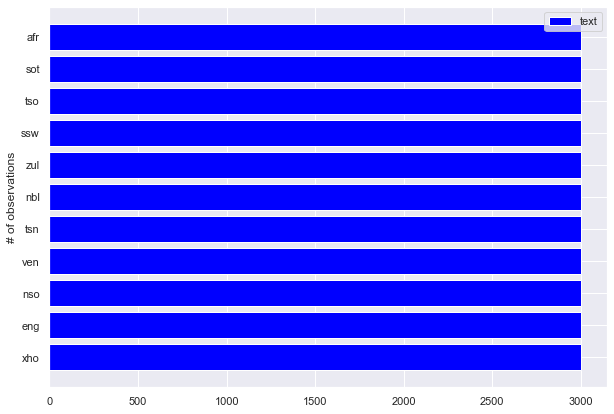

In [11]:
heights = []
for i in languages:
    new = dataset[dataset["lang_id"]==i]
    heights.append(len(new))

plt.barh(languages,heights,color="blue")
plt.yticks(languages)
plt.ylabel("# of observations")
plt.legend(["text"])
plt.show()

In [14]:
text = dataset["text"]
language = dataset["lang_id"]

## train

In [16]:
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

In [17]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  26400
lenght of test data =  6600


In [18]:
t_vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer="char")

c_vectorizer = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(1,3))

In [30]:
pipe_lr_t13 = pipeline.Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", LogisticRegression(max_iter=3000))
    ])

pipe_rf_t13 = pipeline.Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", RandomForestClassifier())
    ])

pipe_lscv_t13 = pipeline.Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", LinearSVC(dual=False))
    ])

pipe_lr_c13 = pipeline.Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", LogisticRegression(max_iter=3000))
    ])

pipe_rf_c13 = pipeline.Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", RandomForestClassifier())
    ])

pipe_lscv_c13 = pipeline.Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", LinearSVC(dual=False))
    ])

pipe_lscv_t110_chw_maxab = pipeline.Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,10), analyzer="char_wb")),
    ('scaler', MaxAbsScaler()),
    ("clf", LinearSVC(dual=False))
    ])

pipe_mnb_t110_chw_maxab = pipeline.Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,10), analyzer="char_wb")),
    ('scaler', MaxAbsScaler()),
    ("clf", MultinomialNB())
    ])

In [31]:
pipe_mnb_t110_chw_maxab.fit(train_features, train_labels)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 10))),
                ('scaler', MaxAbsScaler()), ('clf', MultinomialNB())])

In [33]:
y_pred = pipe_mnb_t110_chw_maxab.predict(test_features)

In [34]:
categories = np.unique(test_labels)
categories

array(['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven',
       'xho', 'zul'], dtype=object)

In [35]:
acc = accuracy_score(test_labels, y_pred)
acc

0.9995454545454545

In [36]:
matrix = confusion_matrix(test_labels, y_pred)
matrix

array([[623,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0, 582,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 563,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 594,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 567,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 628,   0,   0,   0,   0,   0],
       [  0,   1,   0,   1,   0,   0, 609,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 626,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 572,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 645,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 588]],
      dtype=int64)

In [37]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.yticks(rotation=0)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

**[make_confusion_matrix Function Credit](https://github.com/DTrimarchi10/confusion_matrix)**

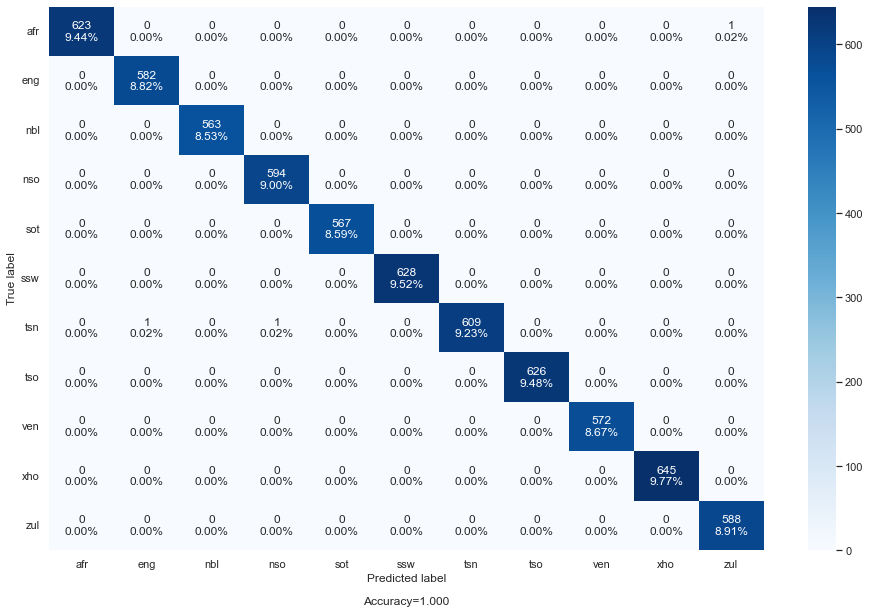

In [38]:
make_confusion_matrix(matrix,
                      categories=categories, 
                      figsize=(16,10))

## predict

In [39]:
model_all = pipeline.Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1,10), analyzer="char")),
    ("transformer", TfidfTransformer(norm="l1", sublinear_tf=True)),
    ('scaler', MaxAbsScaler()),
    ("clf", MultinomialNB())
    ])

# LinearSVC(dual=False)
# KNeighborsClassifier(3)
# SVC(kernel="rbf", C=1, gamma=1)
# MultinomialNB()

In [40]:
model = model_all.fit(text, language)

In [41]:
unseen = pd.read_csv("data/test_set.csv")
unseen.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini naticocisana.
4,5,Winste op buitelandse valuta.


In [42]:
unseen.shape

(5682, 2)

In [43]:
unseen["text"] = unseen["text"].apply(remove_punctuation_numbers_caps)

In [44]:
unseen_prediction = model.predict(unseen["text"])

In [45]:
len(unseen_prediction)

5682

In [46]:
unseen_series = pd.Series(unseen_prediction)
pred = unseen_series.to_frame()
pred = pred.rename(columns = {0:"lang_id"})
sub_df = pd.read_csv("data/test_set.csv")[["index"]]
sub_df2 = sub_df.join(other = pred)
sub_df2.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [47]:
sub_df2.shape

languages = list(sub_df2["lang_id"].unique())
print(languages, len(languages))

['tsn', 'nbl', 'ven', 'ssw', 'afr', 'nso', 'eng', 'sot', 'zul', 'tso', 'xho'] 11


In [48]:
sub_df2.to_csv("submission/sub_pipe_mnb_t110_charwb_maxab.csv", index=False)

In [ ]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC       ","   Logistic Regression   "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2),round(uni_lr,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2),round(bi_lsvc,2),round(bi_lr,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2),round(tri_lsvc,2),round(tri_lr,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2),round(char3_lr,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2),round(char4_lsvc,2),round(char4_lr,2)])
Model_Table.add_row(["  5 Char Gram  ", round(char5_rfc,2),round(char5_lsvc,2),round(char5_lr,2)])
Model_Table.add_row(["  6 Char Gram  ", round(char6_rfc,2),round(char6_lsvc,2),round(char6_lr,2)])
Model_Table.add_row(["  7 Char Gram  ", round(char7_rfc,2),round(char7_lsvc,2),round(char7_lr,2)])
Model_Table.add_row(["  8 Char Gram  ", round(char8_rfc,2),round(char8_lsvc,2),round(char8_lr,2)])
Model_Table.add_row(["  9 Char Gram  ", round(char9_rfc,2),round(char9_lsvc,2),round(char9_lr,2)])
Model_Table.add_row(["  10 Char Gram  ", round(char10_rfc,2),round(char10_lsvc,2),round(char10_lr,2)])
print("Detailed performance of all models:")
print(Model_Table)